In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Civil_Service_List__Active.csv')

In [6]:
df.head(10)

,Exam No,List No,First Name,MI,Last Name,Adj. FA,List Title Code,List Title Desc,Group No,List Agency Code,List Agency Desc,List Div Code,Published Date,Established Date,Anniversary Date,Extension Date,Veteran Credit,Parent Lgy Credit,Sibling Lgy Credit,Residency Credit
0,3528,1138.0,OMAR,NaN,AGUILAR,72.37,70260,LIEUTENANT (POLICE),0,56,POLICE DEPARTMENT,NaN,NaN,12/20/2023,12/20/2027,NaN,NaN,NaN,NaN,NaN
1,6601,24529.0,FRANK,A,GRIFFITH,83.75,91207,CONDUCTOR,0,0,OPEN COMPETITIVE,NaN,NaN,02/14/2018,02/14/2022,02/14/2025,NaN,NaN,NaN,NaN
2,4502,474.0,HENRY,NaN,JABLONSKY,81.03,70392,FIRE MARSHAL (UNIFORMED),0,57,FIRE DEPARTMENT,NaN,NaN,08/06/2014,08/06/2018,08/06/2024,NaN,NaN,NaN,NaN
3,1101,268.0,ANUC,NaN,VELA,80.00,20210,ASSISTANT CIVIL ENGINEER,0,0,OPEN COMPETITIVE,NaN,02/24/2021,09/22/2021,09/22/2025,NaN,NaN,NaN,NaN,NaN
4,2554,119.0,FRANCINE,NaN,WILLIAMS,81.94,82011,SUPERVISOR OF HOUSING CARETAKERS,0,996,N.Y.C. HOUSING AUTHORITY,NaN,NaN,04/19/2023,04/19/2027,NaN,NaN,NaN,NaN,NaN
5,7609,186.0,DAVID,I,BODRICK,70.00,91724,TRANSIT ELECTRICAL HELPER,0,0,OPEN COMPETITIVE,NaN,NaN,12/05/2018,12/05/2022,12/05/2024,NaN,NaN,NaN,NaN
6,7323,6802.0,SHANIYA,NaN,MOORE,87.35,70210,POLICE OFFICER,0,0,OPEN COMPETITIVE,NaN,09/27/2017,12/13/2017,12/13/2021,12/13/2024,NaN,NaN,NaN,Residency Credit
7,311,564.0,JAMES,E,COGDELL,74.12,71651,TRAFFIC ENFORCEMENT AGENT,0,0,OPEN COMPETITIVE,NaN,NaN,06/30/2021,06/30/2025,NaN,NaN,NaN,NaN,NaN
8,1139,993.0,YAN,NaN,HONG,100.00,13632,COMPUTER SPECIALIST (SOFTWARE),0,0,OPEN COMPETITIVE,NaN,11/24/2021,05/18/2022,05/18/2026,NaN,NaN,NaN,NaN,NaN
9,2010,667.0,KELVIN,C,KONG,70.00,53053,EMERGENCY MEDICAL SPECIALIST-EMT,0,0,OPEN COMPETITIVE,NaN,NaN,08/17/2022,08/17/2026,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(491644, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491644 entries, 0 to 491643
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Exam No             491644 non-null  int64  
 1   List No             491644 non-null  float64
 2   First Name          491637 non-null  object 
 3   MI                  272355 non-null  object 
 4   Last Name           491636 non-null  object 
 5   Adj. FA             491644 non-null  float64
 6   List Title Code     491644 non-null  int64  
 7   List Title Desc     491644 non-null  object 
 8   Group No            491644 non-null  int64  
 9   List Agency Code    491644 non-null  int64  
 10  List Agency Desc    491644 non-null  object 
 11  List Div Code       0 non-null       float64
 12  Published Date      221816 non-null  object 
 13  Established Date    476875 non-null  object 
 14  Anniversary Date    476875 non-null  object 
 15  Extension Date      222939 non-nul

In [9]:
df.describe()

,Exam No,List No,Adj. FA,List Title Code,Group No,List Agency Code,List Div Code
count,491644.000000,491644.000000,491644.000000,491644.000000,491644.000000,491644.000000,0.0
mean,4779.889670,5390.232978,87.679663,61834.281218,0.004235,34.467928,NaN
std,3012.996821,8919.457474,9.186821,25340.627262,0.064937,166.102187,NaN
min,100.000000,0.200000,65.000000,10001.000000,0.000000,0.000000,NaN
25%,2060.000000,266.000000,80.500000,53052.000000,0.000000,0.000000,NaN
50%,5317.000000,996.000000,88.230000,70210.000000,0.000000,0.000000,NaN
75%,7323.000000,6406.000000,95.000000,70811.000000,0.000000,0.000000,NaN
max,9729.000000,43921.000000,127.270000,92610.000000,1.000000,998.000000,NaN


In [17]:
df['List Title Desc'].describe()

count             491644
unique               530
top       POLICE OFFICER
freq               85986
Name: List Title Desc, dtype: object

In [19]:
import datetime as dt

In [18]:
df['Published Date'] = pd.to_datetime(df['Published Date'])
df['Established Date'] = pd.to_datetime(df['Established Date'])

In [21]:
exam_count_trend = df.groupby(df['Published Date'].dt.year)['Exam No'].count()
exam_count_trend

Published Date
2013.0     3789
2014.0     5450
2015.0     8437
2016.0     3607
2017.0    13106
2018.0    55201
2019.0    25498
2020.0     6939
2021.0    21435
2022.0    24503
2023.0    50543
2024.0     3308
Name: Exam No, dtype: int64

In [24]:
pass_rate_trend = df.groupby(df['Published Date'].dt.year)['Adj. FA'].mean()
pass_rate_trend

Published Date
2013.0    84.042293
2014.0    86.290277
2015.0    87.714975
2016.0    88.317186
2017.0    88.398470
2018.0    91.027253
2019.0    87.930397
2020.0    83.476868
2021.0    88.180662
2022.0    91.272214
2023.0    90.803869
2024.0    83.273628
Name: Adj. FA, dtype: float64

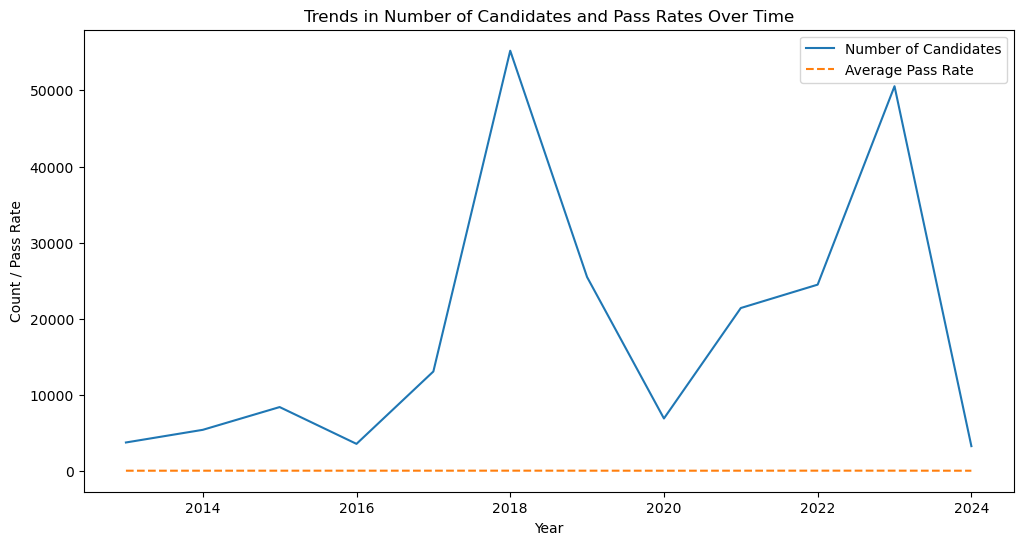

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(exam_count_trend.index, exam_count_trend.values, label='Number of Candidates')
plt.plot(pass_rate_trend.index, pass_rate_trend.values, label='Average Pass Rate', linestyle='--')
plt.title('Trends in Number of Candidates and Pass Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Count / Pass Rate')
plt.legend()
plt.show()

In [28]:
# Extract relevant columns for analysis
credit_data = df[['Veteran Credit', 'Parent Lgy Credit', 'Sibling Lgy Credit', 'Residency Credit', 'Adj. FA']]

# Convert credit columns to boolean (1 for credit, 0 for no credit)
credit_data = credit_data.notnull().astype(int)

# Calculate average scores for each credit combination
avg_scores = credit_data.groupby(['Veteran Credit', 'Parent Lgy Credit', 'Sibling Lgy Credit', 'Residency Credit']).mean()
avg_scores

Adj. FA
Veteran Credit Parent Lgy Credit Sibling Lgy Credit Residency Credit         
0              0                 0                  0                     1.0
                                                    1                     1.0
                                 1                  0                     1.0
                                                    1                     1.0
               1                 0                  0                     1.0
                                                    1                     1.0
                                 1                  0                     1.0
                                                    1                     1.0
1              0                 0                  0                     1.0
                                                    1                     1.0
                                 1                  0                     1.0
                                                    1                     1.0
               1                 0                  0                     1.0
                                                    1                     1.0
                                 1                  0                     1.0
                                                    1                     1.0

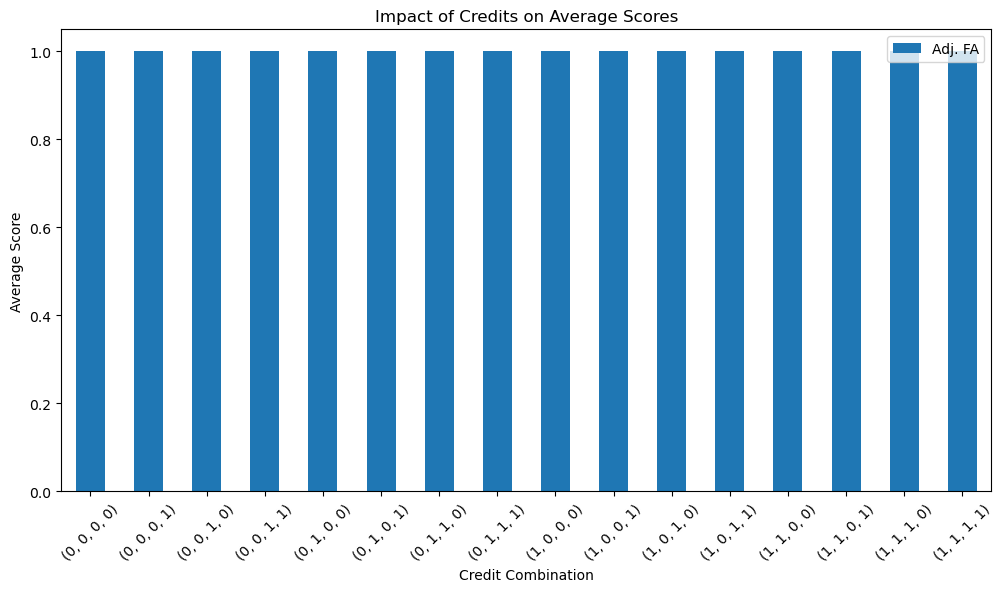

In [29]:
# Plot average scores by credit combination
avg_scores.plot(kind='bar', figsize=(12, 6))
plt.title('Impact of Credits on Average Scores')
plt.xlabel('Credit Combination')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

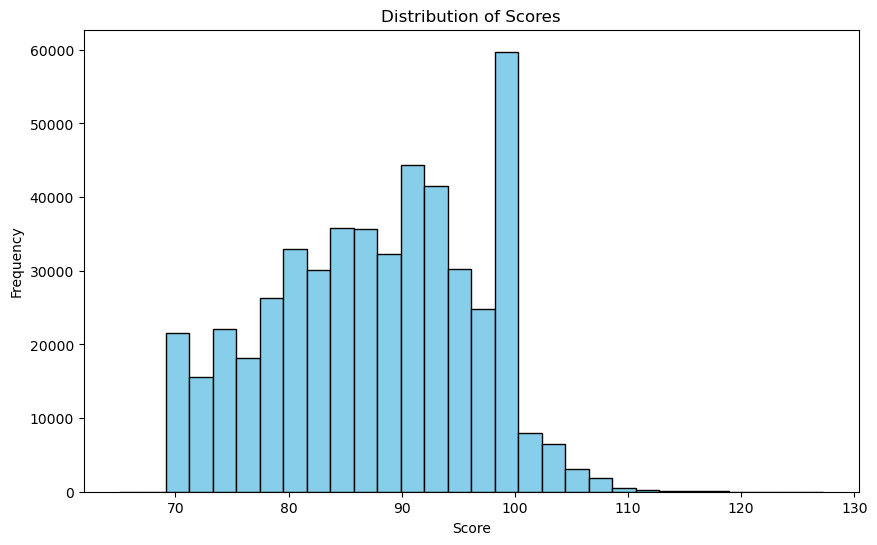

In [31]:
# Plot histogram of scores
plt.figure(figsize=(10, 6))
plt.hist(df['Adj. FA'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

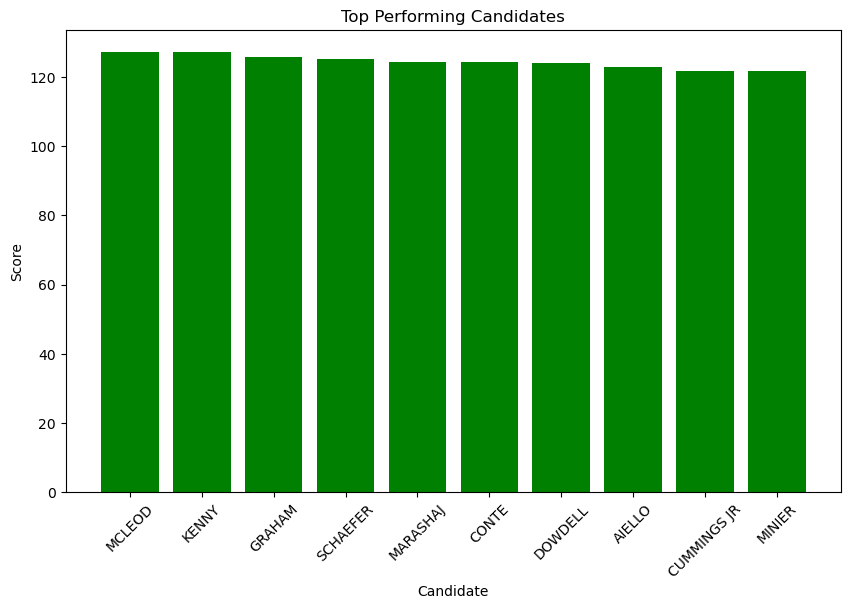

In [33]:
# Sort data by score in descending order
top_performers = df.sort_values(by='Adj. FA', ascending=False).head(10)

# Plot top performers
plt.figure(figsize=(10, 6))
plt.bar(top_performers['Last Name'], top_performers['Adj. FA'], color='green')
plt.title('Top Performing Candidates')
plt.xlabel('Candidate')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

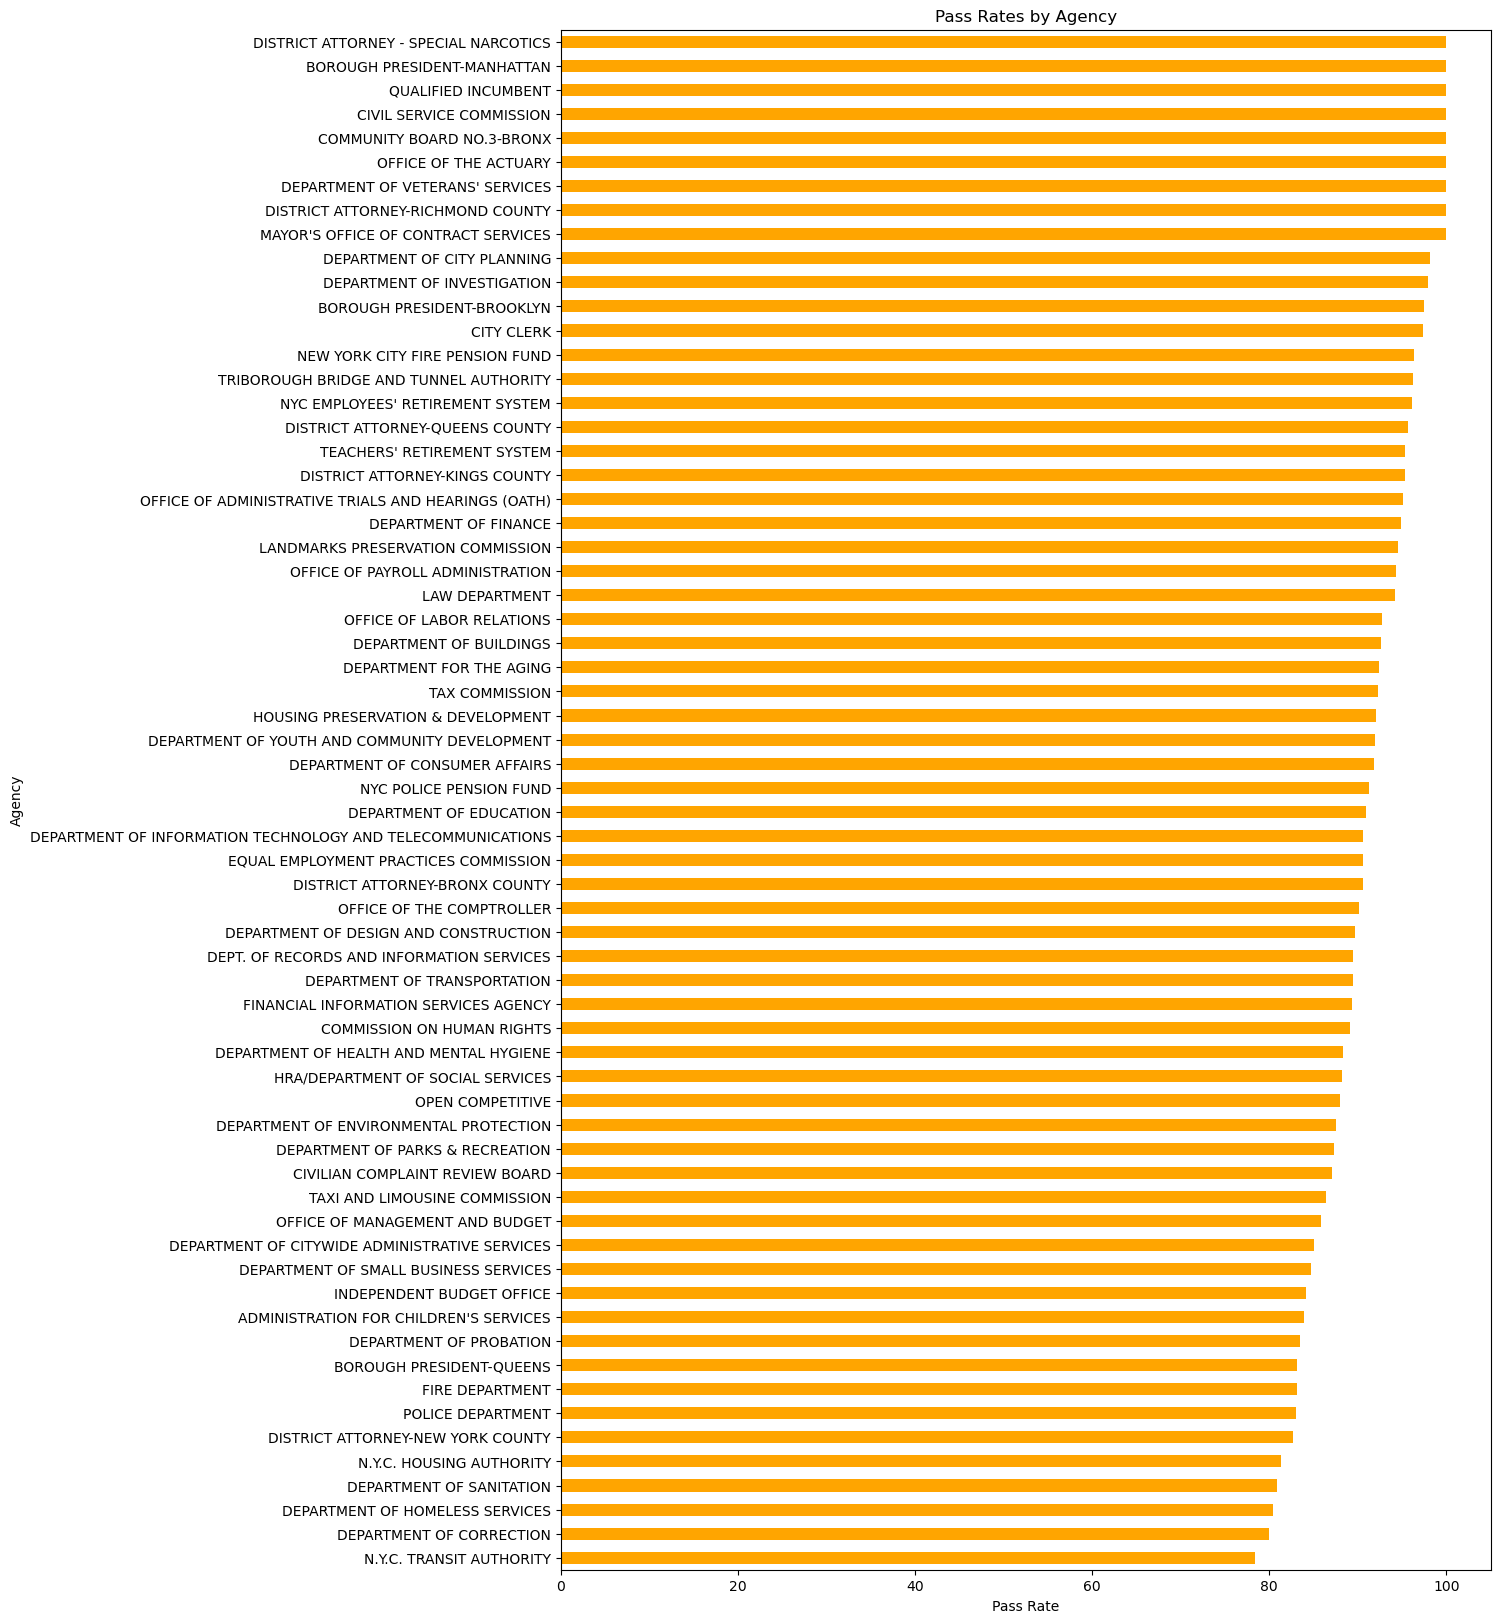

In [35]:
# Calculate pass rates by agency
pass_rates_by_agency = df.groupby('List Agency Desc')['Adj. FA'].mean().sort_values()

# Plot pass rates by agency
plt.figure(figsize=(12, 20))
pass_rates_by_agency.plot(kind='barh', color='orange')
plt.title('Pass Rates by Agency')
plt.xlabel('Pass Rate')
plt.ylabel('Agency')
plt.show()

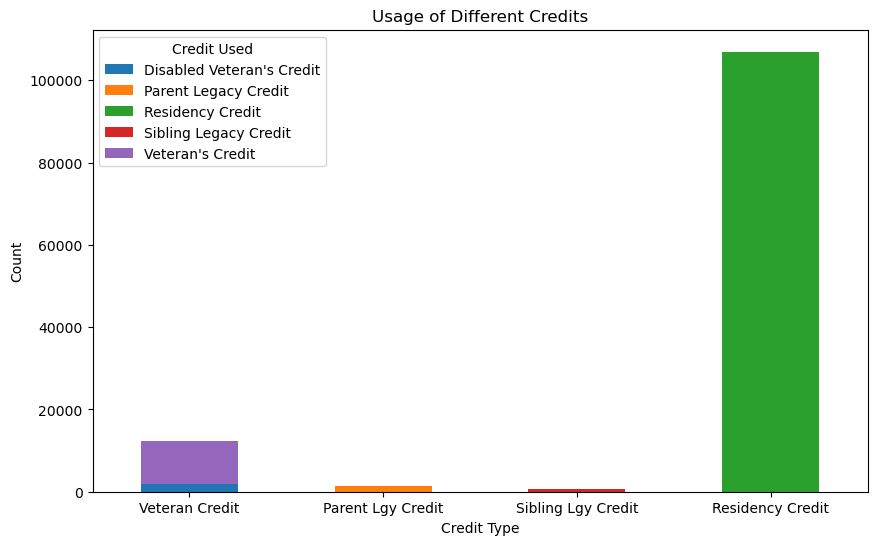

In [36]:
# Count the number of candidates using each type of credit
credit_counts = df[['Veteran Credit', 'Parent Lgy Credit', 'Sibling Lgy Credit', 'Residency Credit']].apply(pd.Series.value_counts)

# Plot credit usage
credit_counts.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Usage of Different Credits')
plt.xlabel('Credit Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Credit Used')
plt.show()

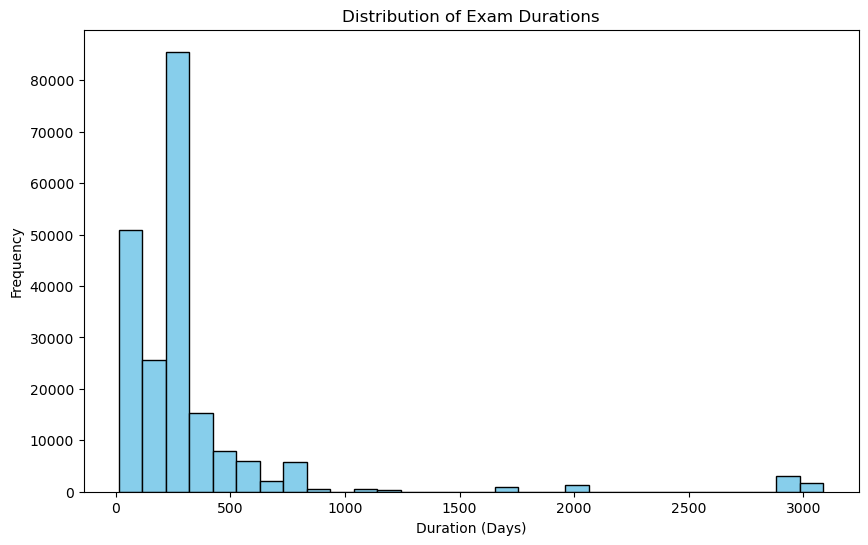

In [39]:
# Calculate duration between publication and establishment dates
df['Duration'] = (df['Established Date'] - df['Published Date']).dt.days

# Plot histogram of exam durations
plt.figure(figsize=(10, 6))
plt.hist(df['Duration'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Exam Durations')
plt.xlabel('Duration (Days)')
plt.ylabel('Frequency')
plt.show()